# Pymaceuticals Inc.
---

### Analysis

- What I found from the data would be that the mean tumor volume from all teh drugs seemed to be pretty consistent but Ketapril and naftisol had a substantial std dev og 8 but also has a high SE. 

- I can also see thatamong the four drugs there only seems to be one outlier on Infubinol but it would be interesting to see this by gender to see if that plays a role. If time permittted I believe that splitting the data by gender can give us more insight on the drug as I believe it can play a role on the outcome. An example being when I did the line plot I tested numerous Mouse ID's and found that some increased while others decreased depending on a multitude of factors of the weight of the tumor aswell as the gender.

- However the
line cor and regression line seem to tell a different story of the drug working for Capulin with a strong correlation of 84% so i could be wrong on my assumptions.
 

In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how='left')
combined_mouse_data.head()

# Display the data table for preview

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [20]:
# Checking the number of mice.
mouse_count = mouse_metadata['Mouse ID'].count()
mouse_count

249

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupli_mouse = combined_mouse_data[combined_mouse_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
dupli_mouse

array(['g989'], dtype=object)

In [12]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(combined_mouse_data)]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [15]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = combined_mouse_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
cleaned_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [23]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = len(cleaned_mouse_data['Mouse ID'].unique())
mouse_count2

249

## Summary Statistics

In [57]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = cleaned_mouse_data.groupby(['Drug Regimen'])

# Calculate the mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = grouped_data['Tumor Volume (mm3)'].mean()
median = grouped_data['Tumor Volume (mm3)'].median()
variance = grouped_data['Tumor Volume (mm3)'].var()
std_dev = grouped_data['Tumor Volume (mm3)'].std()
sem = grouped_data['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({'Mean Tumor Volume': mean,
                           'Median Tumor Volume': median,
                           'Volume Tumor Variance': variance,
                           'Volume Tumor Std. Dev.': std_dev,
                           'Volume Tumor Std. Err.': sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Volume Tumor Variance,Volume Tumor Std. Dev.,Volume Tumor Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [68]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

summary_stats = cleaned_mouse_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

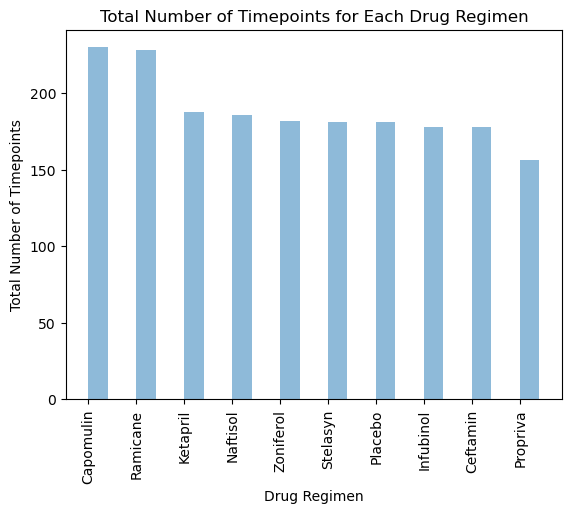

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_per_drug = cleaned_mouse_data['Drug Regimen'].value_counts()

Mouse = [230, 228, 188, 186, 182, 181, 178, 178, 161]

x_labels = mice_per_drug.index.values
y_values = mice_per_drug.values

x_pos = np.arange(len(x_labels))
plt.bar(x_pos + 0.2, y_values, alpha=0.5, align='center', width=0.4)
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.xticks(x_pos, x_labels, rotation=90)
plt.show()

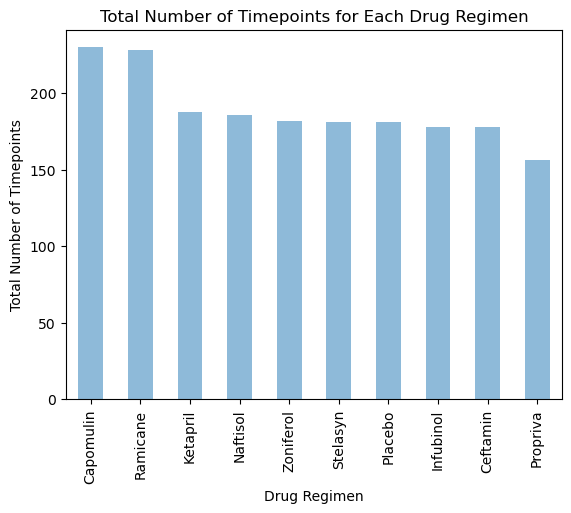

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mice_per_drug = cleaned_mouse_data['Drug Regimen'].value_counts()

mice_per_drug.plot(kind='bar', alpha=0.5, align='center')
plt.title('Total Number of Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Timepoints')
plt.show()

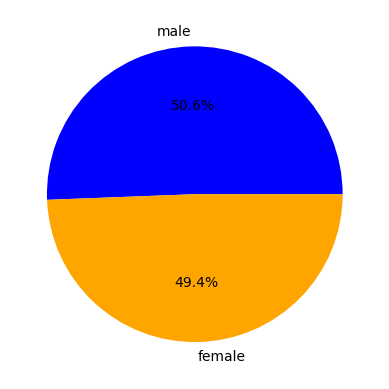

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
labels = ["male", "female"]
sizes = [958, 935]
colors = ["blue", "orange"]

plt.pie(sizes, labels=labels, colors=colors,autopct="%1.1f%%")
plt.show()

In [35]:
mice_gender = cleaned_mouse_data['Sex'].value_counts()
mice_gender

Male      958
Female    930
Name: Sex, dtype: int64

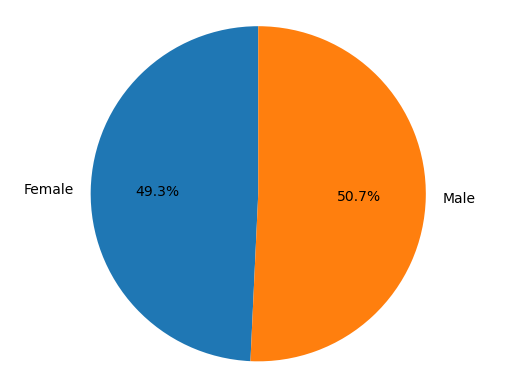

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt
labels = ['Female', 'Male']
sizes = [930, 958] 
fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
plt.show()



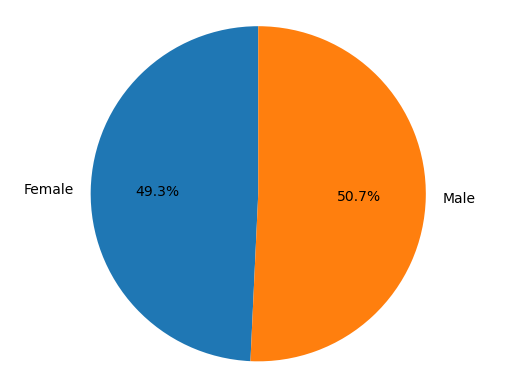

In [37]:
mice_data = [(gender, count) for gender, count in [('Female', 930), ('Male', 958)]]
counts = [data[1] for data in mice_data]
labels = [data[0] for data in mice_data]
fig, ax = plt.subplots()
ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
ax.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [113]:
# Create a new DataFrame that contains only the data for the four specified treatment regimens
four_treatments_df = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Get the last (greatest) timepoint for each mouse
last_timepoints_df = four_treatments_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge the `last_timepoints_df` DataFrame with the `four_treatments_df` DataFrame to get the tumor volume at the last timepoint for each mouse
merged_df = pd.merge(last_timepoints_df, four_treatments_df, on=['Mouse ID', 'Timepoint'])

# Group by "Drug Regimen" and "Mouse ID" to get the final tumor volume for each mouse under each regimen
fin_tumor_vol_df = merged_df.groupby(['Drug Regimen', 'Mouse ID'])['Tumor Volume (mm3)'].last().reset_index()


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_vol = []

# Loop through each treatment in the treatment list
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_rows = fin_tumor_vol_df.loc[fin_tumor_vol_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # Add the tumor volume data to the final_vol list
    final_vol.append(tumor_volume_rows)
    
    # Calculate the quartiles and IQR for the tumor volume data
    quartiles = tumor_volume_rows.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate the upper and lower bounds for potential outliers
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    outliers = tumor_volume_rows.loc[(tumor_volume_rows < lower_bound) | (tumor_volume_rows > upper_bound)]
    
    print(f"Summary statistics for {drug}:")
    print(f"Median: {quartiles[0.5]}")
    print(f"Lower quartile: {lowerq}")
    print(f"Upper quartile: {upperq}")
    print(f"Interquartile range (IQR): {iqr}")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"{drug} has a potential outlier of {outliers}")


Summary statistics for Capomulin:
Median: 38.1251644
Lower quartile: 32.37735684
Upper quartile: 40.1592203
Interquartile range (IQR): 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Capomulin has a potential outlier of Series([], Name: Tumor Volume (mm3), dtype: float64)
Summary statistics for Ramicane:
Median: 36.56165229
Lower quartile: 31.56046955
Upper quartile: 40.65900627
Interquartile range (IQR): 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Ramicane has a potential outlier of Series([], Name: Tumor Volume (mm3), dtype: float64)
Summary statistics for Infubinol:
Median: 60.16518046
Lower quartile: 54.04860769
Upper quartile: 65.52574285
Interquartile range (IQR): 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Infubinol has a potential outlier of 55    36.321346
Name: Tumor Volu

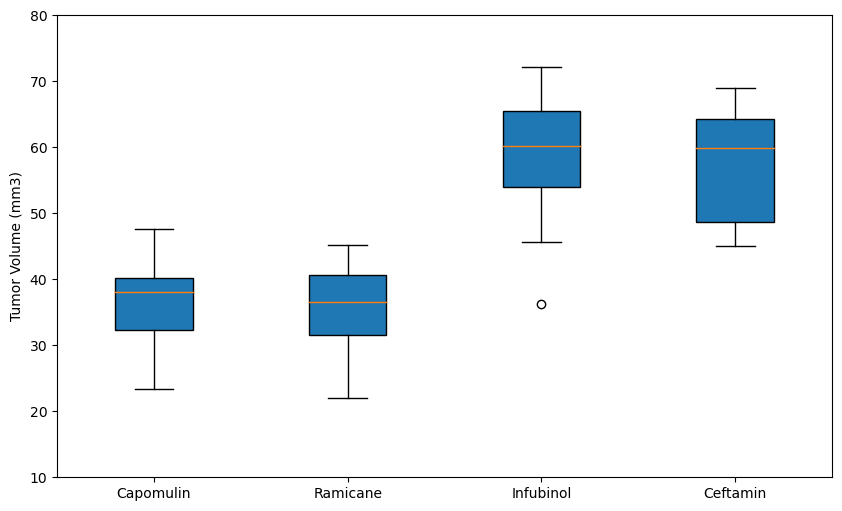

In [80]:
# Generate a box plot of the final tumor volume for each treatment regimen
fig1, ax1 = plt.subplots(figsize=(10,6))
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(final_vol, labels=treatment_list, widths=0.4, patch_artist=True, vert=True)

plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

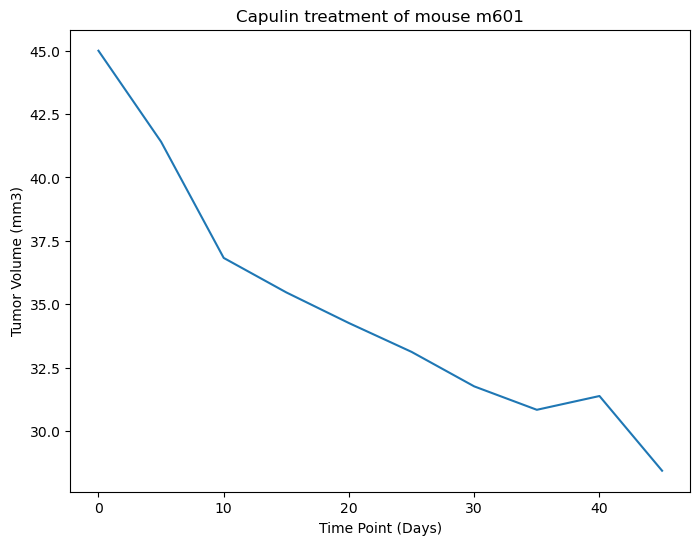

In [91]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_id = 'm601'
capomulin_data = cleaned_mouse_data[(cleaned_mouse_data['Mouse ID'] == mouse_id) & (cleaned_mouse_data['Drug Regimen'] == 'Capomulin')]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'])

ax.set_title(f"Capulin treatment of mouse {mouse_id}")
ax.set_xlabel("Time Point (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.show()



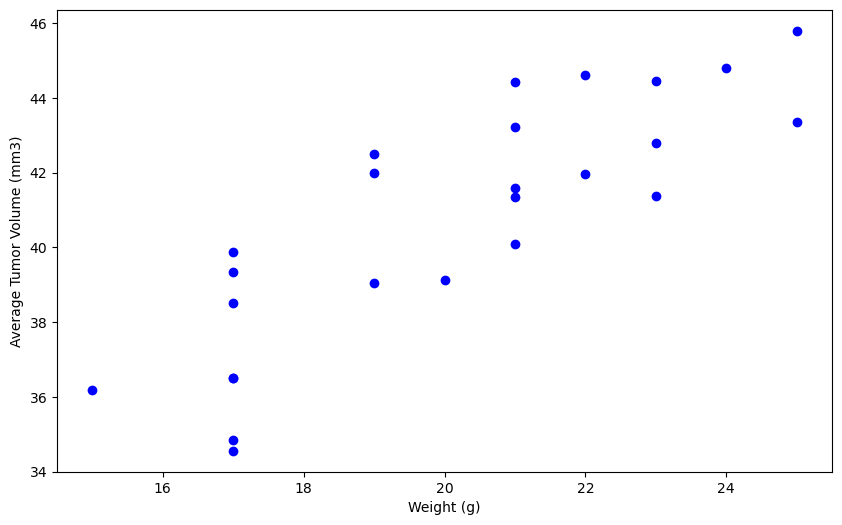

In [92]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='b')

ax.set_xlabel("Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")

plt.show()



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is: 0.8419363424694718


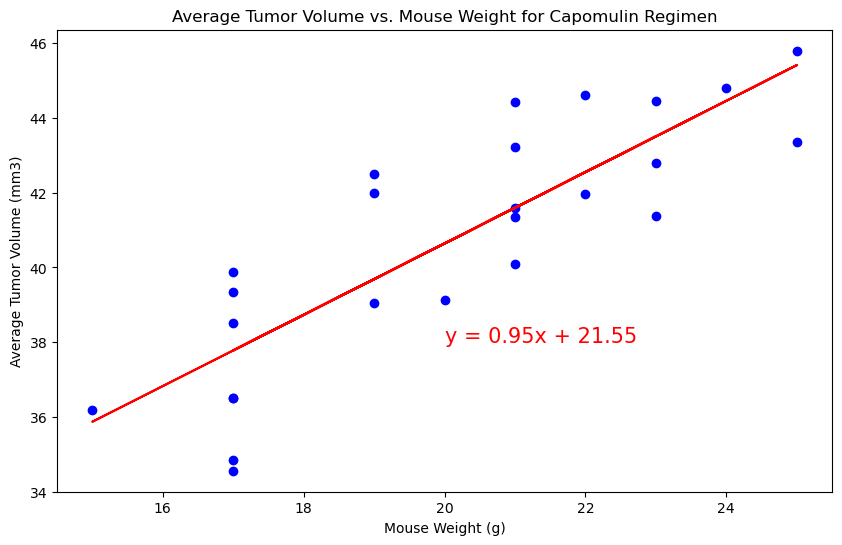

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_data = cleaned_mouse_data[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_avg = capomulin_data.groupby('Mouse ID').mean()[['Tumor Volume (mm3)', 'Weight (g)']]
correlation = st.pearsonr(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])[0]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'])
regress_values = capomulin_avg['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='b')
ax.plot(capomulin_avg['Weight (g)'], regress_values, color='r')
ax.annotate(line_eq,(20,38),fontsize=15,color="red")

ax.set_title("Average Tumor Volume vs. Mouse Weight for Capomulin Regimen")
ax.set_xlabel("Mouse Weight (g)")
ax.set_ylabel("Average Tumor Volume (mm3)")

print(f"The correlation between mouse weight and the average tumor volume is: {correlation}")
plt.show()
